In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
%matplotlib inline

In [2]:
df=pd.read_csv("hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Exploratory Data Analysis

In [3]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [4]:
df["DateTime"]=df[['dteday','hr']].apply(lambda x:x['dteday']+" "+str(x["hr"])+":00",axis=1)

In [5]:
def zero_pad_hour(s):
    if len(str(s))==2:
        return str(s)
    else:
        return "0"+str(s)


In [6]:
df["DateTime"]=df[['dteday','hr']].apply(lambda x:x['dteday']+\
                                         " "+zero_pad_hour(x["hr"])+":00",axis=1)

In [7]:
df["DateTime"]=pd.to_datetime(df.DateTime,format="%Y-%m-%d %H:%M")

In [8]:
count=df.cnt

In [9]:
count.index=df.DateTime

C:\Users\rohan\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


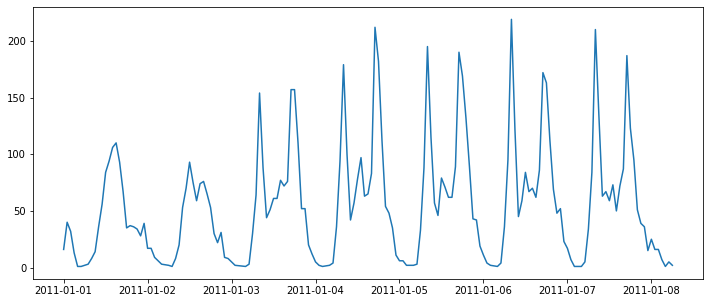

In [10]:
plt.figure(figsize=(12,5))
plt.plot(count[:24*7])

In [11]:
df.weathersit.value_counts()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

In [12]:
df.groupby("weathersit")["cnt"].mean()

weathersit
1    204.869272
2    175.165493
3    111.579281
4     74.333333
Name: cnt, dtype: float64

In [13]:
df.groupby("weathersit")["casual"].mean()

weathersit
1    40.545431
2    29.595290
3    16.055673
4     2.666667
Name: casual, dtype: float64

In [14]:
df.groupby("weathersit")["registered"].mean()

weathersit
1    164.323841
2    145.570202
3     95.523608
4     71.666667
Name: registered, dtype: float64

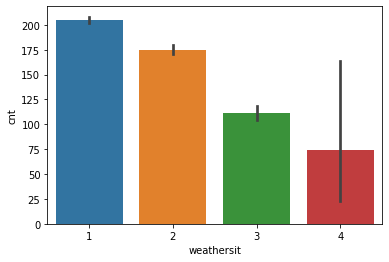

In [15]:
df.weathersit=df.weathersit.astype(str)
sns.barplot(x='weathersit',y='cnt',data=df)

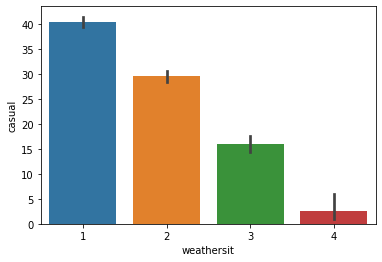

In [16]:
sns.barplot(x='weathersit',y='casual',data=df)

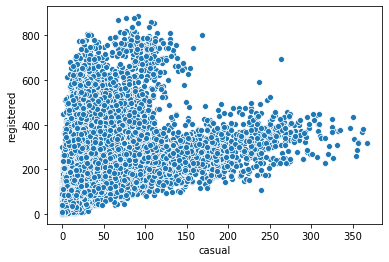

In [17]:
sns.scatterplot(df.casual,df.registered)

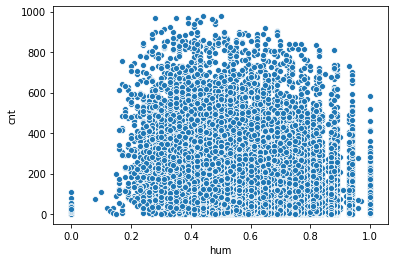

In [18]:
sns.scatterplot(df.hum,df.cnt)

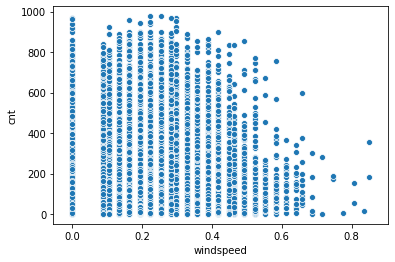

In [19]:
sns.scatterplot(df.windspeed,df.cnt)

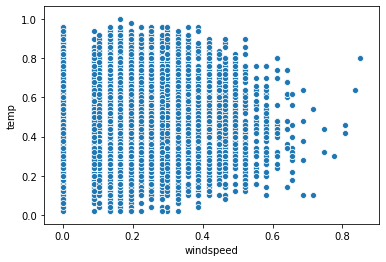

In [20]:
sns.scatterplot(df.windspeed,df.temp)

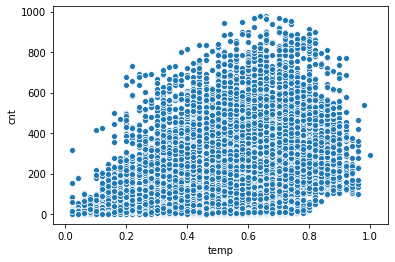

In [21]:
sns.scatterplot(df.temp,df.cnt)

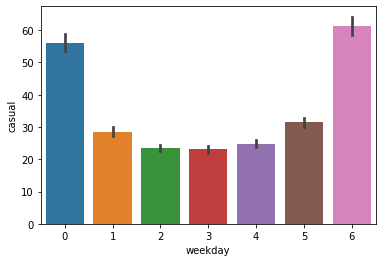

In [22]:
sns.barplot(df.weekday,df.casual)

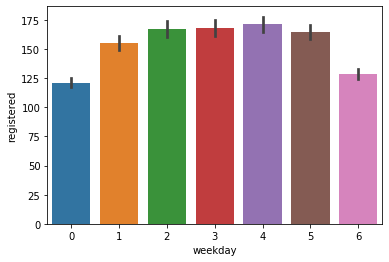

In [23]:
sns.barplot(df.weekday,df.registered)

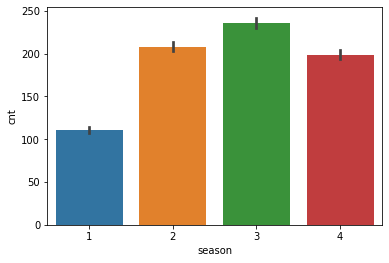

In [24]:
sns.barplot(df.season,df.cnt)

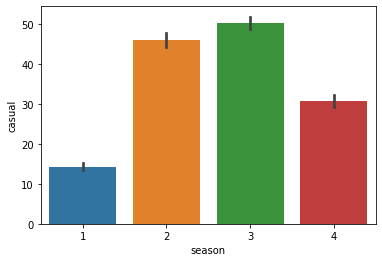

In [25]:
sns.barplot(df.season,df.casual)

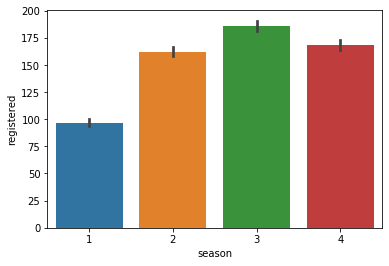

In [26]:
sns.barplot(df.season,df.registered)

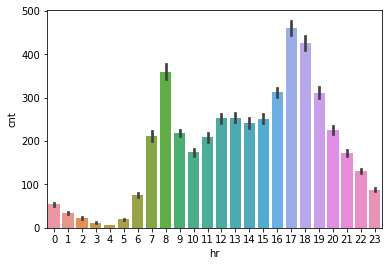

In [27]:
sns.barplot(df.hr,df.cnt)

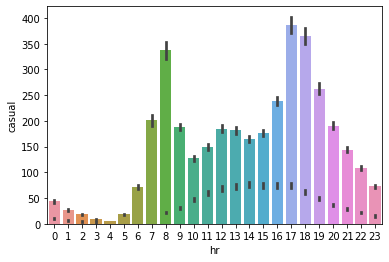

In [28]:
sns.barplot(df.hr,df.registered)
sns.barplot(df.hr,df.casual)

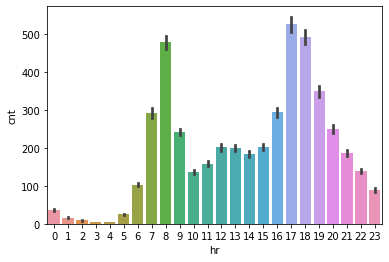

In [29]:
sns.barplot(df[df.workingday==1].hr,df[df.workingday==1].cnt)

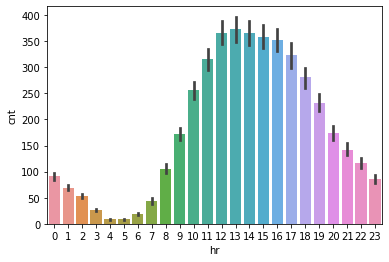

In [30]:
sns.barplot(df[df.workingday==0].hr,df[df.workingday==0].cnt)

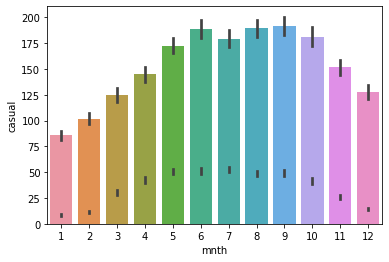

In [31]:
sns.barplot(df.mnth,df.registered)
sns.barplot(df.mnth,df.casual)

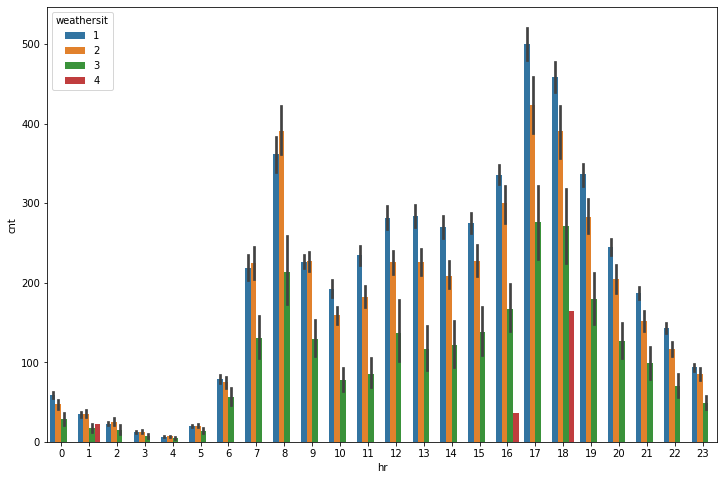

In [32]:
plt.figure(figsize=(12,8))
sns.barplot(x='hr',y='cnt',hue='weathersit',data=df)

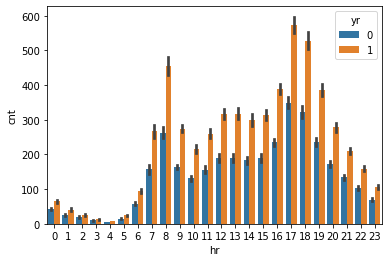

In [33]:
sns.barplot(x='hr',y='cnt',hue='yr',data=df)

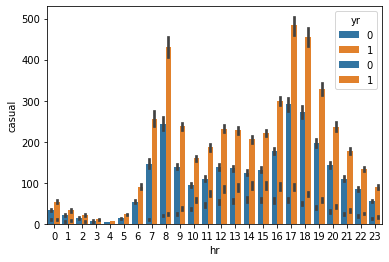

In [34]:
sns.barplot(x='hr',y='registered',hue='yr',data=df)
sns.barplot(x='hr',y='casual',hue='yr',data=df)

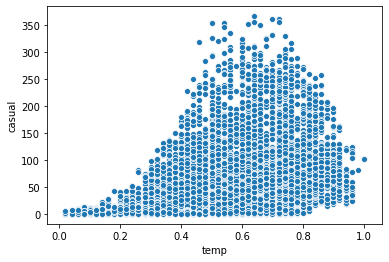

In [35]:
sns.scatterplot(df.temp,df.casual)

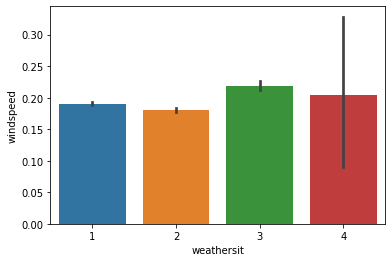

In [36]:
sns.barplot(df.weathersit,df.windspeed)

In [37]:
df.groupby('yr')['cnt'].sum()

yr
0    1243103
1    2049576
Name: cnt, dtype: int64

In [38]:
2049576/1243103*100

164.87579870694543

In [39]:
df.groupby('yr')['registered'].sum()

yr
0     995851
1    1676811
Name: registered, dtype: int64

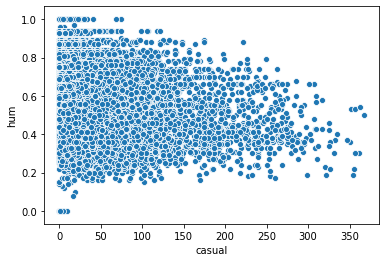

In [40]:
sns.scatterplot(df.casual,df.hum)

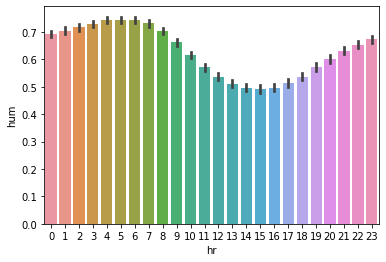

In [41]:
sns.barplot(df.hr,df.hum)

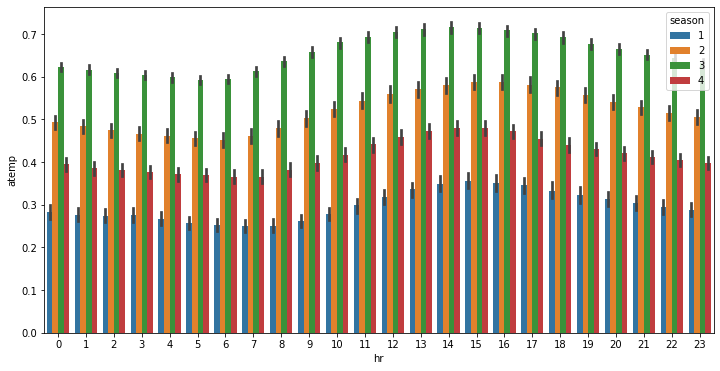

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(x='hr',y='atemp',hue='season',data=df)

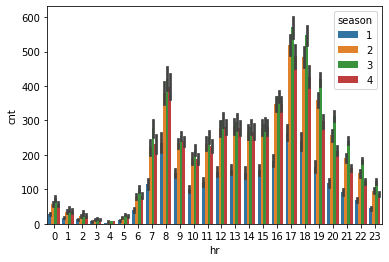

In [43]:
sns.barplot(x='hr',y='cnt',hue='season',data=df)

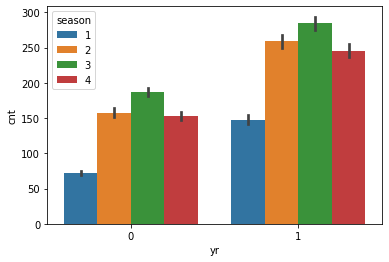

In [44]:
sns.barplot(x="yr",y='cnt',hue='season',data=df)

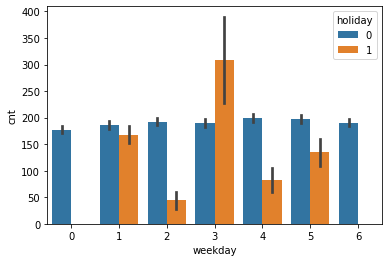

In [45]:
sns.barplot(x="weekday",y='cnt',hue='holiday',data=df)

In [46]:
df.holiday.value_counts()

0    16879
1      500
Name: holiday, dtype: int64

In [47]:
df.groupby('season')['atemp'].mean()

season
1    0.298116
2    0.520547
3    0.656004
4    0.415738
Name: atemp, dtype: float64

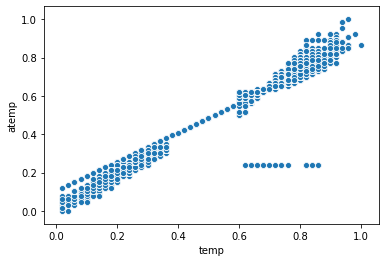

In [48]:
sns.scatterplot(df.temp,df.atemp)

# Data Cleaning

In [49]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'DateTime'],
      dtype='object')

In [50]:
X=df[['season', 'yr', 'mnth', 'hr', \
      'workingday','weathersit', 'temp','hum', 'windspeed']].copy()
y=df.registered

In [51]:
X["DayNight"]=X.hr.map(lambda x: 0 if x<7 else 1)

In [52]:
def peakhour(x):
    if x in [7,8,16,17,18,19]:
        return 1
    else:
        return 0
X["PeakHours"]=X.hr.map(peakhour)


In [53]:
X

,season,yr,mnth,hr,workingday,weathersit,temp,hum,windspeed,DayNight,PeakHours
0,1,0,1,0,0,1,0.24,0.81,0.0000,0,0
1,1,0,1,1,0,1,0.22,0.80,0.0000,0,0
2,1,0,1,2,0,1,0.22,0.80,0.0000,0,0
3,1,0,1,3,0,1,0.24,0.75,0.0000,0,0
4,1,0,1,4,0,1,0.24,0.75,0.0000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,1,2,0.26,0.60,0.1642,1,1
17375,1,1,12,20,1,2,0.26,0.60,0.1642,1,0
17376,1,1,12,21,1,1,0.26,0.60,0.1642,1,0
17377,1,1,12,22,1,1,0.26,0.56,0.1343,1,0


In [54]:
#lets create some dummies
dummy=pd.get_dummies(X.weathersit,prefix="WeatherSit")
#join the dummy to dataframe
X=X.join(dummy)
#drop weather sit col
X=X.drop(['weathersit'],axis=1)

# Modeling

In [55]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
y_hat=lr.predict(X)

In [57]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("R sq",r2_score(y,y_hat))
print("MAE",mean_absolute_error(y,y_hat))
print("MSE",mean_squared_error(y,y_hat))
print("RMSE",mean_squared_error(y,y_hat)**0.5)

R sq 0.6026021202792493
MAE 70.23538539781528
MSE 9103.475302620154
RMSE 95.41213393809068


In [58]:
residuals=y-y_hat
sum(residuals) #1

-1.238930735780741e-09

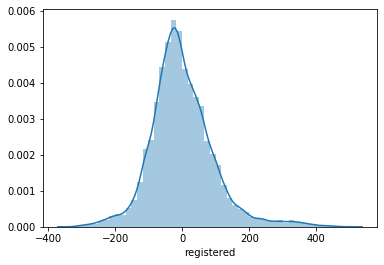

In [59]:
sns.distplot(residuals) #2

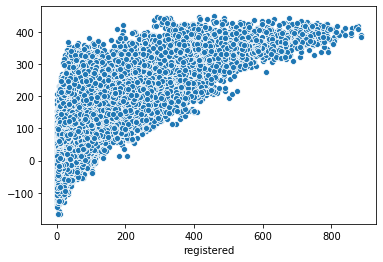

In [60]:
sns.scatterplot(y,y_hat)

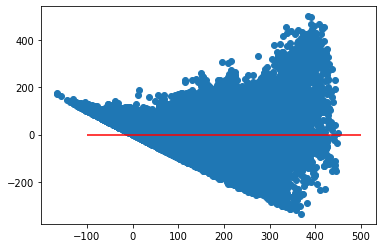

In [61]:
plt.scatter(y_hat,residuals)
plt.hlines(y=0,xmin=-100,xmax=500,colors='r')

# Log-Normal_Model

In [62]:
log_y=np.log1p(y)

In [63]:
model=LinearRegression()
model.fit(X,log_y)
model.score(X,log_y)

0.7071546922863512

In [64]:
for col,m in zip(X.columns,model.coef_):
    print(col,"*",m,"+")
print(model.intercept_)

season * 0.1760074899624073 +
yr * 0.4728937901963197 +
mnth * -0.00919523193006977 +
hr * -0.009753262322422868 +
workingday * 0.1265402466363156 +
temp * 1.3085559311940724 +
hum * -0.4926287771995352 +
windspeed * -0.047151647448892234 +
DayNight * 2.108100756921881 +
PeakHours * 0.5539710055970533 +
WeatherSit_1 * 0.09681615755855814 +
WeatherSit_2 * 0.10960496147564942 +
WeatherSit_3 * -0.35861370288066285 +
WeatherSit_4 * 0.15219258384645618 +
1.7502623866331906


In [65]:
y_hat=model.predict(X)
y_hat=np.exp(y_hat)

In [66]:
print("R sq",r2_score(y,y_hat))
print("MAE",mean_absolute_error(y,y_hat))
print("MSE",mean_squared_error(y,y_hat))
print("RMSE",mean_squared_error(y,y_hat)**0.5)

R sq 0.6157593520019199
MAE 60.10538216029428
MSE 8802.073256584206
RMSE 93.819365040402


In [67]:
residuals=log_y-model.predict(X)
sum(residuals) #1

-1.1934897514720433e-11

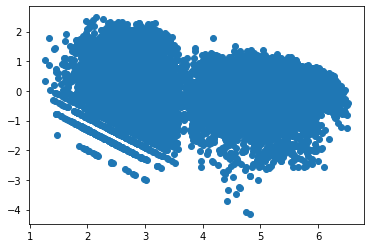

In [68]:
plt.scatter(model.predict(X),residuals)
#plt.hlines(y=0,xmin=-100,xmax=500,colors='r')

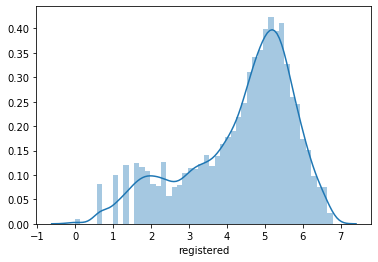

In [69]:
sns.distplot(log_y)

# Non Linear Model

In [70]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=4,include_bias=False)
X_poly=poly.fit_transform(X)

In [71]:
model=LinearRegression(n_jobs=-1)
model.fit(X_poly,log_y)
model.score(X_poly,log_y)

0.9428723046891293

In [72]:
print("e^(")
for m,col in zip(model.coef_,poly.get_feature_names()):
    print(col,"*",m,"+")
print(model.intercept_,")")

e^(
x0 * -1.6721731788122833 +
x1 * -0.2875328521502974 +
x2 * -0.17320528704122332 +
x3 * 0.1454013920105118 +
x4 * -0.2534677269135399 +
x5 * -4.2402665091757985 +
x6 * -0.5099871803204512 +
x7 * -1.6780296790154992 +
x8 * -3.480302509075225 +
x9 * -0.3505861154672593 +
x10 * 0.03501340529667306 +
x11 * 0.04938348220824347 +
x12 * -0.06670837041722086 +
x13 * -0.017688515907723572 +
x0^2 * -1.8111539225569695 +
x0 x1 * -0.5804452429326832 +
x0 x2 * 2.2127627211104133 +
x0 x3 * -0.04412716954278374 +
x0 x4 * 0.3220724410787172 +
x0 x5 * 2.5417871315928395 +
x0 x6 * 3.481777934127777 +
x0 x7 * -1.8436969395364269 +
x0 x8 * 0.21129987577096826 +
x0 x9 * 0.09306907129165108 +
x0 x10 * -0.5520406547160035 +
x0 x11 * -0.6928339212782954 +
x0 x12 * -0.409610088128666 +
x0 x13 * -0.017688517184518394 +
x1^2 * -0.28753285661304323 +
x1 x2 * 0.0810645833780253 +
x1 x3 * -0.027779981367861563 +
x1 x4 * -0.05959148358750817 +
x1 x5 * 2.346604108762116 +
x1 x6 * 1.472737106223213 +
x1 x7 * 1.7533

x2^2 x11 * -0.06802943126798663 +
x2^2 x12 * -0.1021100274598156 +
x2^2 x13 * -0.01768851728132505 +
x2 x3^2 * -0.003216972308199284 +
x2 x3 x4 * -0.0015199860296425116 +
x2 x3 x5 * -0.015087954599957654 +
x2 x3 x6 * 0.021599979913554238 +
x2 x3 x7 * -0.0102245639474666 +
x2 x3 x8 * -0.01435597072220541 +
x2 x3 x9 * -0.003597912911500023 +
x2 x3 x10 * 0.007983776116263656 +
x2 x3 x11 * 0.003334652940802263 +
x2 x3 x12 * -0.006238467331760759 +
x2 x3 x13 * -0.0177988327677915 +
x2 x4^2 * 0.003858314703901161 +
x2 x4 x5 * -0.2727934170904842 +
x2 x4 x6 * 0.032404390237610034 +
x2 x4 x7 * 0.10619729615392769 +
x2 x4 x8 * -0.13874776165815697 +
x2 x4 x9 * 0.010558142250071002 +
x2 x4 x10 * 0.0784169159291016 +
x2 x4 x11 * -0.011628119809085687 +
x2 x4 x12 * -0.06291653926129988 +
x2 x4 x13 * -1.3942161053657884e-05 +
x2 x5^2 * 1.2343599505657519 +
x2 x5 x6 * 3.6572858384745985 +
x2 x5 x7 * 2.397405722631865 +
x2 x5 x8 * 0.3120855254592698 +
x2 x5 x9 * -0.061356487835643375 +
x2 x5 x10 * -0

x6 x8^2 * 1.902629736299442 +
x6 x8 x9 * -1.6157689834574975 +
x6 x8 x10 * 1.1640976878125058 +
x6 x8 x11 * 2.46397552702361 +
x6 x8 x12 * -1.7254270537346192 +
x6 x8 x13 * -1.6424801658414487e-05 +
x6 x9^2 * -1.615768983457026 +
x6 x9 x10 * -0.5942900460640714 +
x6 x9 x11 * -0.5535272842387049 +
x6 x9 x12 * -0.467935228352304 +
x6 x9 x13 * -1.642480180081078e-05 +
x6 x10^2 * -0.8417723400878604 +
x6 x10 x11 * 8.54316617449058e-14 +
x6 x10 x12 * -3.2940317140628395e-13 +
x6 x10 x13 * 9.57012247226885e-14 +
x6 x11^2 * -0.42650253358057366 +
x6 x11 x12 * -1.3744561044859438e-13 +
x6 x11 x13 * -1.2967404927621828e-13 +
x6 x12^2 * 0.773504253997638 +
x6 x12 x13 * -1.8240964294591322e-13 +
x6 x13^2 * -0.015216559403670333 +
x7^3 * 4.570976766385918 +
x7^2 x8 * 7.055332726356729 +
x7^2 x9 * -2.310913179038596 +
x7^2 x10 * -1.231216240139466 +
x7^2 x11 * -0.4783703114544834 +
x7^2 x12 * -0.6951552121622342 +
x7^2 x13 * -0.0006716357965208073 +
x7 x8^2 * -0.4361328818774891 +
x7 x8 x9 * 0.8647

x0 x1 x4 x8 * 0.05621046429504331 +
x0 x1 x4 x9 * 0.021593109999803906 +
x0 x1 x4 x10 * -0.045826471344840775 +
x0 x1 x4 x11 * -0.1174339013706931 +
x0 x1 x4 x12 * 0.35223775937599366 +
x0 x1 x4 x13 * 4.9408461291523966e-05 +
x0 x1 x5^2 * -1.9566965557389429 +
x0 x1 x5 x6 * -0.7715237970283205 +
x0 x1 x5 x7 * 0.7137395226847453 +
x0 x1 x5 x8 * 0.25001411589514644 +
x0 x1 x5 x9 * -0.37362333217622135 +
x0 x1 x5 x10 * -0.4369938003412789 +
x0 x1 x5 x11 * -0.09920584745379898 +
x0 x1 x5 x12 * 1.775434011186534 +
x0 x1 x5 x13 * -0.002464558824466774 +
x0 x1 x6^2 * -0.3142155695677801 +
x0 x1 x6 x7 * -2.784325221612666 +
x0 x1 x6 x8 * 0.7170535458369124 +
x0 x1 x6 x9 * -0.04637402255263842 +
x0 x1 x6 x10 * 0.09513644463953355 +
x0 x1 x6 x11 * 0.47483370357009586 +
x0 x1 x6 x12 * -0.030934928649011192 +
x0 x1 x6 x13 * -0.015157643325473149 +
x0 x1 x7^2 * -1.510973148440051 +
x0 x1 x7 x8 * -0.44307368457973606 +
x0 x1 x7 x9 * 0.20115659418784684 +
x0 x1 x7 x10 * -0.2353451649131526 +
x0 x1 x7

x0 x5^3 * 2.943909773767013 +
x0 x5^2 x6 * 6.560844375324051 +
x0 x5^2 x7 * 7.51518197975424 +
x0 x5^2 x8 * -0.7101164952618838 +
x0 x5^2 x9 * -0.5884719013397709 +
x0 x5^2 x10 * -2.485292718027186 +
x0 x5^2 x11 * -3.195362458469579 +
x0 x5^2 x12 * -1.781661325267831 +
x0 x5^2 x13 * -0.00034751150398501263 +
x0 x5 x6^2 * 7.778577685078398 +
x0 x5 x6 x7 * 2.869769002609813 +
x0 x5 x6 x8 * 1.7445207165773764 +
x0 x5 x6 x9 * 0.15842424885363632 +
x0 x5 x6 x10 * -3.122714667405731 +
x0 x5 x6 x11 * -5.444263232249293 +
x0 x5 x6 x12 * -1.8897768749078865 +
x0 x5 x6 x13 * -0.0021324821262179495 +
x0 x5 x7^2 * -3.885412310353081 +
x0 x5 x7 x8 * 6.014390000463027 +
x0 x5 x7 x9 * 1.8768964174922365 +
x0 x5 x7 x10 * -2.990126382029724 +
x0 x5 x7 x11 * -4.438828804283772 +
x0 x5 x7 x12 * 5.088086951713244 +
x0 x5 x7 x13 * -0.00048373301635490866 +
x0 x5 x8^2 * -1.1222658088934763 +
x0 x5 x8 x9 * 0.06875272298440217 +
x0 x5 x8 x10 * 1.0307947538688524 +
x0 x5 x8 x11 * 0.7977316880565629 +
x0 x5 x8 

x1^2 x11^2 * 0.021431420637338952 +
x1^2 x11 x12 * 0.0 +
x1^2 x11 x13 * 0.0 +
x1^2 x12^2 * -0.3825097976658292 +
x1^2 x12 x13 * 0.0 +
x1^2 x13^2 * -0.017625166657518666 +
x1 x2^3 * -0.012645783284671586 +
x1 x2^2 x3 * 0.0004933609212635082 +
x1 x2^2 x4 * -0.004354413106518448 +
x1 x2^2 x5 * 0.009753404460474527 +
x1 x2^2 x6 * -0.0028623520976601338 +
x1 x2^2 x7 * -0.008620966596570589 +
x1 x2^2 x8 * -0.01870596104687612 +
x1 x2^2 x9 * 0.006354604935006197 +
x1 x2^2 x10 * 0.029474855144601866 +
x1 x2^2 x11 * 0.02829424302227453 +
x1 x2^2 x12 * 0.033988087783875603 +
x1 x2^2 x13 * -0.017625166657534514 +
x1 x2 x3^2 * -0.0006738772772610924 +
x1 x2 x3 x4 * -0.0005494807655923237 +
x1 x2 x3 x5 * -0.0031864533570427483 +
x1 x2 x3 x6 * 0.01029973982926631 +
x1 x2 x3 x7 * -0.004868229561818363 +
x1 x2 x3 x8 * 0.02059010357633844 +
x1 x2 x3 x9 * -0.0023668707486558666 +
x1 x2 x3 x10 * 0.0077840030778701524 +
x1 x2 x3 x11 * 0.00410186676286802 +
x1 x2 x3 x12 * -0.0018127417224606604 +
x1 x2 x3 

x1 x6^3 * 1.4954058834404955 +
x1 x6^2 x7 * 5.792197036741225 +
x1 x6^2 x8 * 1.5293592508373264 +
x1 x6^2 x9 * -0.4875794080736745 +
x1 x6^2 x10 * -0.8529788524830654 +
x1 x6^2 x11 * -0.6658375498072462 +
x1 x6^2 x12 * -0.7072224195807485 +
x1 x6^2 x13 * -0.013035573259925489 +
x1 x6 x7^2 * 7.423855701739889 +
x1 x6 x7 x8 * 1.22862705840581 +
x1 x6 x7 x9 * 0.8390746155912066 +
x1 x6 x7 x10 * 0.5643296496089466 +
x1 x6 x7 x11 * -0.6370715216185086 +
x1 x6 x7 x12 * -5.213592079260921 +
x1 x6 x7 x13 * -0.002945018894432458 +
x1 x6 x8^2 * -0.5593179607297574 +
x1 x6 x8 x9 * 0.2300056886308203 +
x1 x6 x8 x10 * 0.013607019484769842 +
x1 x6 x8 x11 * -0.15767024707936592 +
x1 x6 x8 x12 * -0.41529722441363515 +
x1 x6 x8 x13 * 4.249127673012381e-05 +
x1 x6 x9^2 * 0.23000568863066886 +
x1 x6 x9 x10 * -0.021048881924636297 +
x1 x6 x9 x11 * 0.21137071112159359 +
x1 x6 x9 x12 * 0.0396413681575425 +
x1 x6 x9 x13 * 4.2491276736869176e-05 +
x1 x6 x10^2 * 0.1821299395653666 +
x1 x6 x10 x11 * 0.0 +
x1 x6

x2 x4 x12^2 * -0.06291653926058911 +
x2 x4 x12 x13 * 0.0 +
x2 x4 x13^2 * -1.3942160804445341e-05 +
x2 x5^3 * -0.7725694087909909 +
x2 x5^2 x6 * -2.674322888553218 +
x2 x5^2 x7 * -2.9039383959107963 +
x2 x5^2 x8 * -0.11610039894668053 +
x2 x5^2 x9 * 0.20353031135422606 +
x2 x5^2 x10 * 0.7326452200645873 +
x2 x5^2 x11 * 0.9948111379701688 +
x2 x5^2 x12 * -0.49274889596730914 +
x2 x5^2 x13 * -0.00034751150398241553 +
x2 x5 x6^2 * -2.553256047902625 +
x2 x5 x6 x7 * -2.147869357298443 +
x2 x5 x6 x8 * -0.2671536232800367 +
x2 x5 x6 x9 * -0.09574056447239288 +
x2 x5 x6 x10 * 1.4083961564453125 +
x2 x5 x6 x11 * 1.7791316622095494 +
x2 x5 x6 x12 * 0.47189050194524107 +
x2 x5 x6 x13 * -0.0021324821262256135 +
x2 x5 x7^2 * 2.0668098156906116 +
x2 x5 x7 x8 * -1.7604398039445144 +
x2 x5 x7 x9 * -0.735659935853062 +
x2 x5 x7 x10 * 1.166111969608539 +
x2 x5 x7 x11 * 1.6723465656274752 +
x2 x5 x7 x12 * -0.44056907958547376 +
x2 x5 x7 x13 * -0.0004837330163440118 +
x2 x5 x8^2 * 0.31208552546014606 +
x2

x3 x5 x12 x13 * 0.0 +
x3 x5 x13^2 * -0.00251956424568481 +
x3 x6^3 * -0.0923796418295743 +
x3 x6^2 x7 * 0.0656686352390954 +
x3 x6^2 x8 * 0.0001509038944754815 +
x3 x6^2 x9 * -0.14939096413744998 +
x3 x6^2 x10 * 0.06843141395030056 +
x3 x6^2 x11 * 0.07319547616146453 +
x3 x6^2 x12 * 0.07430798332257764 +
x3 x6^2 x13 * -0.013291022042853408 +
x3 x6 x7^2 * 0.36128652886843743 +
x3 x6 x7 x8 * 0.8133386075793144 +
x3 x6 x7 x9 * 0.022688821100576195 +
x3 x6 x7 x10 * -0.18289260797401793 +
x3 x6 x7 x11 * -0.15075033261075713 +
x3 x6 x7 x12 * -0.37584797449061075 +
x3 x6 x7 x13 * -0.0031898648247188233 +
x3 x6 x8^2 * -0.5441905661229836 +
x3 x6 x8 x9 * 0.35600718588060687 +
x3 x6 x8 x10 * -0.06512318734294989 +
x3 x6 x8 x11 * -0.27363879639512756 +
x3 x6 x8 x12 * -0.20525076812793294 +
x3 x6 x8 x13 * -0.00017781427546906194 +
x3 x6 x9^2 * 0.35600718588059976 +
x3 x6 x9 x10 * 0.09348069016325634 +
x3 x6 x9 x11 * 0.16303352351017997 +
x3 x6 x9 x12 * 0.09967078648006462 +
x3 x6 x9 x13 * -0.00017

x4 x7 x8 x11 * -0.7786778694151683 +
x4 x7 x8 x12 * 0.9113671668732554 +
x4 x7 x8 x13 * -1.637734615510611e-05 +
x4 x7 x9^2 * 0.2647986280545209 +
x4 x7 x9 x10 * -0.008473868382113172 +
x4 x7 x9 x11 * 0.09707142501165662 +
x4 x7 x9 x12 * 0.17621744877129653 +
x4 x7 x9 x13 * -1.6377346155108713e-05 +
x4 x7 x10^2 * 0.9364780009273405 +
x4 x7 x10 x11 * 0.0 +
x4 x7 x10 x12 * 0.0 +
x4 x7 x10 x13 * 0.0 +
x4 x7 x11^2 * 0.6366584323994978 +
x4 x7 x11 x12 * 0.0 +
x4 x7 x11 x13 * 0.0 +
x4 x7 x12^2 * -1.3884177687165593 +
x4 x7 x12 x13 * 0.0 +
x4 x7 x13^2 * -1.6377346155104376e-05 +
x4 x8^3 * 2.582906700264757 +
x4 x8^2 x9 * -0.19035500797591032 +
x4 x8^2 x10 * 1.0976411511183364 +
x4 x8^2 x11 * 0.9948031757614366 +
x4 x8^2 x12 * 0.4904763155454103 +
x4 x8^2 x13 * -1.3942160804434933e-05 +
x4 x8 x9^2 * -0.19035500797591254 +
x4 x8 x9 x10 * -0.04802547931712751 +
x4 x8 x9 x11 * -0.05786645180723052 +
x4 x8 x9 x12 * -0.08444913469406341 +
x4 x8 x9 x13 * -1.3942160804439703e-05 +
x4 x8 x10^2 * 1.097

x8^2 x9 x10 * -0.12785399624014263 +
x8^2 x9 x11 * -0.13725578405530692 +
x8^2 x9 x12 * -0.08546238735529608 +
x8^2 x9 x13 * -1.3942160804444474e-05 +
x8^2 x10^2 * -1.4970307014008883 +
x8^2 x10 x11 * 0.0 +
x8^2 x10 x12 * 0.0 +
x8^2 x10 x13 * 0.0 +
x8^2 x11^2 * -1.6683599590523823 +
x8^2 x11 x12 * 0.0 +
x8^2 x11 x13 * 0.0 +
x8^2 x12^2 * -0.3148979083898861 +
x8^2 x12 x13 * 0.0 +
x8^2 x13^2 * -1.3942160804444474e-05 +
x8 x9^3 * -0.35058610981208244 +
x8 x9^2 x10 * -0.12785399624014263 +
x8 x9^2 x11 * -0.13725578405530692 +
x8 x9^2 x12 * -0.08546238735529608 +
x8 x9^2 x13 * -1.3942160804444474e-05 +
x8 x9 x10^2 * -0.12785399624014263 +
x8 x9 x10 x11 * 0.0 +
x8 x9 x10 x12 * 0.0 +
x8 x9 x10 x13 * 0.0 +
x8 x9 x11^2 * -0.13725578405530692 +
x8 x9 x11 x12 * 0.0 +
x8 x9 x11 x13 * 0.0 +
x8 x9 x12^2 * -0.08546238735529608 +
x8 x9 x12 x13 * 0.0 +
x8 x9 x13^2 * -1.3942160804444474e-05 +
x8 x10^3 * -1.4970307014008883 +
x8 x10^2 x11 * 0.0 +
x8 x10^2 x12 * 0.0 +
x8 x10^2 x13 * 0.0 +
x8 x10 x11^2 * 0

In [73]:
y_hat=np.exp(model.predict(X_poly))

In [74]:
r2_score(y,y_hat)

0.8820941925977899

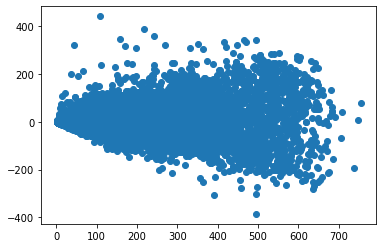

In [75]:
residuals=y-y_hat
plt.scatter(y_hat,residuals)


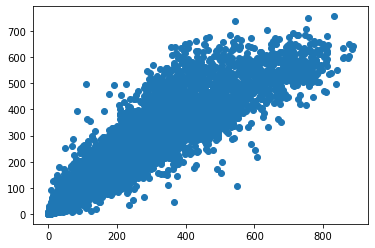

In [76]:
plt.scatter(y,y_hat)